# Data preparation

1. Research goal:
2. Dataset chosen: Glass identification

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [4]:
# Import data
file_path = "glass_data.csv"
headers = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
glass_df = pd.read_csv(file_path, sep=',', decimal='.', header=None, names=headers, index_col=0)

In [6]:
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [45]:
# Shape of data
glass_df.shape

(214, 10)

In [8]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


The description indicates that:
- The attributes are all numeric types. There are no data type entry errors.
- The number of instances is 214, which matches the number of attributes in each column. We deduce that there is no missing values in the dataset.

We further detects impossible values and outliers in the dataset using boxplot. Here, the outliers are identified via IQR method. That means, a value is considered in outlier if it is outside the range of Q3-Q1 interquatile range. (ref)

Text(0.5, 0.98, 'Chemical element distribution in glass')

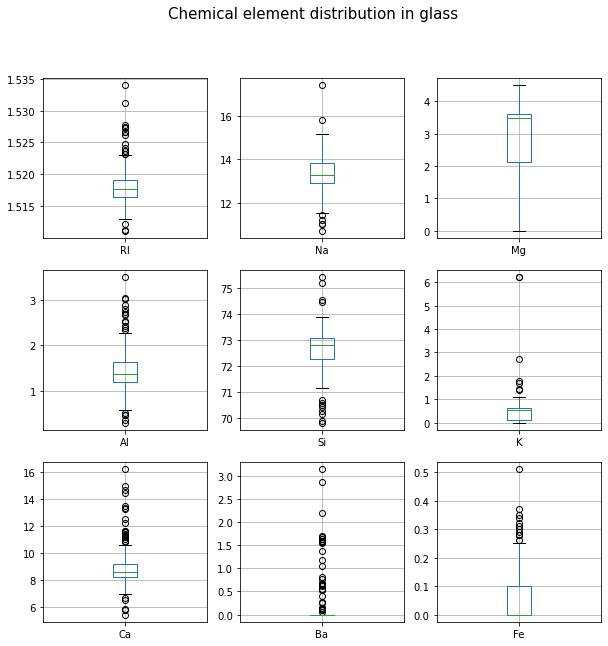

In [43]:
fig, axes = plt.subplots(3,3, figsize=(10,10))

for i in range(len(headers)-1):
    a = glass_df.boxplot(column=headers[i], ax = axes.flatten()[i], figsize=(12,8))
fig.suptitle('Chemical element distribution in glass', fontsize=15)

From the boxplot, it can be observed that:
1. About outliers 
- Most of the figures have outliers, except for Magnesium.
- Boxplot figure is not applied well for Barium, so we cannot decide whether it has outliers or not. 
- Apart from Na and K, other elements have an excessive number of outliers.
2. Shape of data
- None of the features are normally distributed. 
- The data values are not in the same range, for which we need to normalize before moving to data modelling stage.

We will deal with the outliers in the data normalization stage, after exploring the relationship between attributes.

<AxesSubplot:>

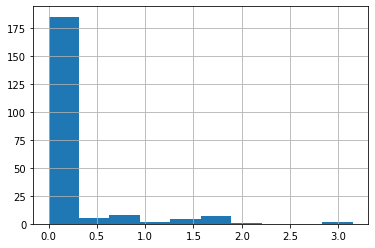